In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [3]:
# read csv file and intialize AI startups dataset 
df = pd.read_csv("startups.csv").drop(columns=["link", "website"])
df.head(200)

,Unnamed: 0,joined,kind,location,market,name,pitch,raised,size,stage,query,type_,tech
0,0,Jul 10,Startup,Berkeley,Enterprise Resource Planning,Vufind (DBA DeepVu),\r\nDeep learning as a service for maximizing ...,"$680,000",11-50,Seed,artificial intelligence,Startup,Python
1,1,Dec 10,Startup,Toronto,Customer Service,nmodes,\r\nnmodes creates Artificial Intelligence sol...,"$100,000",1-10,Seed,artificial intelligence,Startup,Python
2,2,Jan 12,Startup,Santa Monica,Data Mining,Tagasauris,\r\nVideo Search and Discovery Platform \r\n,"$1,000,000",1-10,Seed,artificial intelligence,Startup,Python
3,3,Apr 12,Startup,San Francisco,Location Based Services,ZoeMob,\r\nGlobal Family Assistant\r\n,"$800,000",1-10,Seed,artificial intelligence,Startup,Python
4,4,Nov 12,Startup,San Francisco,Machine Learning,Encore,\r\nThe first automated data scientist for mar...,"$987,000",1-10,Seed,artificial intelligence,Startup,Python
5,5,Apr 13,Startup,Silicon Valley,Internet of Things,Healthy Stove,\r\nSmart Technology for Eating Smarter\r\n,"$88,000",1-10,Seed,artificial intelligence,Startup,Python
6,6,Nov 13,Startup,Pune,Location Based Services,Quinto,\r\nFood Discovery & Recommendation\r\n,-,1-10,Seed,artificial intelligence,Startup,Python
7,7,Oct 13,Startup,New York City,Messaging,Apartment Ocean,\r\nAI platform for customer service in real e...,"$370,000",11-50,Seed,artificial intelligence,Startup,Python
8,8,Jan 14,Startup,-,Consumer Lending,RedCarpet.CASH,\r\nData driven Lending for purchase finance...,"$120,000",51-200,Seed,artificial intelligence,Startup,Python
9,9,Feb 14,Startup,Los Angeles,Virtual Reality,Voyadi,\r\nTravel with Passion and Purpose \r\n,-,11-50,Seed,artificial intelligence,Startup,Python


In [4]:
# convert raised to double
import re
# convert currency to numerics
def currency(s):
    try:
        return float(''.join(re.findall(r'\d', s)))
    except:
        return np.nan

df.raised = df.raised.apply(currency)

In [5]:
from datetime import datetime
def process_date(date):
    date = datetime.strptime(date, "%b %y")
    return date


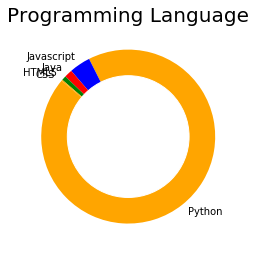

In [28]:
# most used programming language among AI startups
# create data
programming = df.groupby(['tech']).count().name.sort_values(ascending=False)

# Donut Chart
labels = programming.index.tolist()
values = programming.values.tolist()

# white circle in the middle
white_circle = plt.Circle((0,0), 0.7, color='white')

# color the donut chart and graph it
plt.pie(values, labels=labels, colors=['orange', 'blue', 'red', 'green'],startangle=140)
p=plt.gcf()
p.gca().add_artist(white_circle)
plt.title("Programming Languages", fontsize=20)
plt.show()
